# [Pandas](http://pandas.pydata.org)

Библиотека для работы с данными и таблицами в питоне.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## Основные структуры

Основными структурами данных в **Pandas** являются классы **Series** и **DataFrame**.  
Первый из них представляет собой одномерный индексированный массив данных некоторого фиксированного типа. Мы можем думать о Series как о векторе из [numpy](https://numpy.org/).  

## [Series](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.html)

Одномерный индексированный массив данных некоторого фиксированного типа. Мы можем думать о Series как о векторе из [numpy](https://numpy.org/).

In [4]:
salaries = pd.Series(data = [80000, 67000, 75000], 
           index = ['Андрей', 'Владимир', 'Анна']) 
print(salaries)        

Андрей      80000
Владимир    67000
Анна        75000
dtype: int64


In [5]:
type(salaries)

pandas.core.series.Series

Посмотрим на среднюю зарплату.  
Функции numpy принимают pd.Series, так как для него они выглядят как np.array. Можно проделать двумя способами

In [6]:
np.mean(salaries), salaries.mean()

(74000.0, 74000.0)

Посмотрим на людей, чья зарплата выше средней:

In [7]:
salaries[salaries > salaries.mean()] # по сути используем булеву маску в numpy array

Андрей    80000
Анна      75000
dtype: int64

Мы можем обращаться к элементам pd.Series как `salaries['Name']` или `salaries.Name`. Например:

In [8]:
salaries.Андрей, salaries['Андрей']

(80000, 80000)

Можно добавлять новые элементы, обращаясь к несуществующему элементу:

In [9]:
salaries['Кот'] = 100500
salaries

Андрей       80000
Владимир     67000
Анна         75000
Кот         100500
dtype: int64

Индексом может быть строка, состоящая из нескольких слов.  
Также, значением в pd.Series может быть `None`, точнее, его аналог в `numpy - np.nan` (not a number):  

In [10]:
salaries['Шрек Третий'] = np.nan
salaries

Андрей          80000.0
Владимир        67000.0
Анна            75000.0
Кот            100500.0
Шрек Третий         NaN
dtype: float64

В данных часто бывают пропуски, поэтому вы часто будете видеть `np.nan`.  
Важно уметь находить их и обрабатывать.  
Получим битовую маску для пропущенных значений: 

In [11]:
salaries.isna()

Андрей         False
Владимир       False
Анна           False
Кот            False
Шрек Третий     True
dtype: bool

In [12]:
salaries[salaries.isna()]

Шрек Третий   NaN
dtype: float64

Назначим минимальную зарплату всем, у кого ее нет: 

In [14]:
salaries.fillna(1.0)
salaries


Андрей          80000.0
Владимир        67000.0
Анна            75000.0
Кот            100500.0
Шрек Третий         1.0
dtype: float64

## [DataFrame](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.html)

**Dataframe** - это двухмерная структура данных (матрица), представляющая собой таблицу, каждый столбец которой содержит данные одного типа. Можно представлять её как словарь объектов типа Series. 

Структура DataFrame отлично подходит для представления реальных данных: строки соответствуют признаковым описаниям отдельных объектов, а столбцы соответствуют признакам.

### Создание Датафрейма 

Создадим pd.DataFrame из единичной numpy-матрицы:

In [17]:
df1 = pd.DataFrame(data = np.eye(3), 
                   index=['a', 'b', 'c'], 
                   columns=['col1', 'col2', 'col3'],
                   dtype=int)
df1

,col1,col2,col3
a,1,0,0
b,0,1,0
c,0,0,1


Можно создавать pd.DataFrame из словаря.  
Ключами будут названия столбцов, а значениями - списки значений в этих столбцах.  
pd.DataFrame может хранить значения любых типов. Но в пределах одного столбца тип может быть только один:  

In [18]:
dictionary = {
    'A': np.arange(3),
    'B': ['a', 'b', 'c'],
    'C': np.arange(3) > 1
}
df1 = pd.DataFrame(dictionary)
df1

,A,B,C
0,0,a,False
1,1,b,False
2,2,c,True


Столбцу присваивается тип numpy.array, из которого он появился.

In [19]:
df1.dtypes

A     int64
B    object
C      bool
dtype: object

## Индексация: at, loc, iloc.

Можем обращаться к отдельному элементу в таблице через `at` (это быстро):

In [20]:
df1.at[2, 'B']

'c'

Можем обращаться к куску таблицы через loc (это всего лишь в [22 раза медленнее](https://stackoverflow.com/questions/37216485/pandas-at-versus-loc), чем at):

In [21]:
df1.loc[1:2, ['A', 'B']]

,A,B
1,1,b
2,2,c


Чтобы обращаться к столбцу по индексу (они там есть, хоть явно и не указаны) можно воспользоваться функцией `iloc`, которая работает аналогично `loc`

In [22]:
df1.iloc[1:3, 1:3]

,B,C
1,b,False
2,c,True


Можем изменять элементы, обращаясь к ним через `at` и присваивая значение:

In [23]:
df1.at[2, 'B'] = 'Z'
df1

,A,B,C
0,0,a,False
1,1,b,False
2,2,Z,True


С помощью loc можно изменять сразу всю строку.  
И даже создавать новые. Заметим, что индексы вообще говоря идут совсем не подряд и даже не по порядку.

In [24]:
df1.loc[2] = [2,'c', True]
df1.loc[17] = [17, '!', False]
df1.loc[9] = [9, '!', False]
df1

,A,B,C
0,0,a,False
1,1,b,False
2,2,c,True
17,17,!,False
9,9,!,False


Чтобы удалить строки, можно воспользоваться функцией `drop`

In [25]:
df1 = df1.drop([1,9,17])
df1

,A,B,C
0,0,a,False
2,2,c,True


## [copy](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.copy.html), [reset_index](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.reset_index.html), nan-ы

Создадим копию нашей таблицы без последнего столбца.  
Затем, присоединим новую таблицу к старой и посмотрим, что будет.

In [39]:
df1_copy = df1.copy().loc[:, ['A', 'B']]
df1_copy = pd.concat([df1, df1_copy])
df1_copy

,A,B,C
0,0,a,False
2,2,c,True
0,0,a,NaN
2,2,c,NaN


Вообще говоря так делать - плохо. Индекс строки также копируется.

In [40]:
try:
    df1_copy[0]
except KeyError:
    print('too many objects with same index (0)')

too many objects with same index (0)


Чтобы индексация была валидной, нужно провести реиндексацию фрейма.

In [50]:
df1_copy = df1_copy.reset_index(drop=True) #флаг drop - означает, что мы удаляем старый индекс, иначе - он просто станет столбцом

Кстати, чтобы постоянно не писать

```pandas_df_1 = pandas_df_1.function()``` 

в pandas существует параметр inplace=True


При таком параметре функция не содает новый объект, который мы потом присваиваем, а меняет сам объект

Тот же код будет выглядеть проще (особенно когда у датафреймов длинные названия 🤗):

```pandas_df_1.function(inplace=True)```

Вот теперь можно работать с таблицей.

Заметим, что 
* при взятии loc и других операций начальная таблица не изменяется
* значения, которые мы не знали, заполнились NaN.

Выкинем все строки, в которых есть NaN. (Чтобы сбросить столбцы - `axis=1`)

In [42]:
df1_copy.dropna(axis=0)

,A,B,C
0,0,a,False
2,2,c,True


Заменим все NaN каким-то значением:

In [43]:
df1_copy.fillna(False, inplace=True)

,A,B,C
0,0,a,False
2,2,c,True
0,0,a,False
2,2,c,False


## Нечисловые индексы. MultiIndex.
Вообще говоря, никто не запрещает делать нечисловые индексы, как и колонки. В этом случае к ним придется обращаться по тому индексу, как они обозначены.

In [26]:
index = ['Firefox', 'Chrome', 'Safari', 'IE10', 'Konqueror']
df3 = pd.DataFrame({
   'http_status': [200,200,404,404,301],
   'response_time': [0.04, 0.02, 0.07, 0.08, 1.0]},
    index=index)
df3

,http_status,response_time
Firefox,200,0.04
Chrome,200,0.02
Safari,404,0.07
IE10,404,0.08
Konqueror,301,1.00


In [27]:
df3.loc['Firefox']

http_status      200.00
response_time      0.04
Name: Firefox, dtype: float64

`iloc` будет работать с обычными индексами по строке

In [28]:
df3.iloc[0,1]

0.04

Нечисловая индексация особо часто встречается при группировкач - о них ниже.

Можно делать еще более сложные вещи, а именно многоуровневые индексы и многоуровневые колонки. Именно благодаря устройству мультииндексов мы можем удобно группировать объекты. 

In [29]:
idx = pd.MultiIndex.from_product([['Zara', 'LV', 'Roots'],
                                  ['Orders', 'GMV', 'AOV']],
                                 names=['Brand', 'Metric'])
col = ['Yesterday', 'Yesterday-1', 'Yesterday-7', 'Thirty day average']

df_mul = pd.DataFrame('-', idx, col)
df_mul

Yesterday Yesterday-1 Yesterday-7 Thirty day average
Brand Metric                                                     
Zara  Orders         -           -           -                  -
      GMV            -           -           -                  -
      AOV            -           -           -                  -
LV    Orders         -           -           -                  -
      GMV            -           -           -                  -
      AOV            -           -           -                  -
Roots Orders         -           -           -                  -
      GMV            -           -           -                  -
      AOV            -           -           -                  -

## Чтение из файла

Основным форматом для хранения и передачи фреймов является - `CSV` (comma separated values / разделение по запятой). Можно читать данные абсолютно разных форматов `.txt`, `.tsv` или `.xlsx`. Но нужно аккуратно работать с `header`-ами и индексами, чтобы данные не потерялись.
* [read_csv](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html#pandas.read_csv)
* [read_fwf](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_fwf.html#pandas.read_fwf)
* [read_excel](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_excel.html)

Загрузим небольшой csv-файл по финансовой отчетности.

In [51]:
df = pd.read_csv('data/data_type.csv')

In [52]:
df

,Customer Number,Customer Name,2016,2017,Percent Growth,Jan Units,Month,Day,Year,Active
0,10002.0,Quest Industries,"$125,000.00",$162500.00,30.00%,500,1,10,2015,Y
1,552278.0,Smith Plumbing,"$920,000.00","$101,2000.00",10.00%,700,6,15,2014,Y
2,23477.0,ACME Industrial,"$50,000.00",$62500.00,25.00%,125,3,29,2016,Y
3,24900.0,Brekke LTD,"$350,000.00",$490000.00,4.00%,75,10,27,2015,Y
4,651029.0,Harbor Co,"$15,000.00",$12750.00,-15.00%,Closed,2,2,2014,N


В Jupyter-ноутбуках датафреймы `Pandas` выводятся в виде вот таких красивых табличек, и `print(df)` выглядит хуже.

In [32]:
print(df)

   Customer Number     Customer Name         2016          2017  \
0          10002.0  Quest Industries  $125,000.00    $162500.00   
1         552278.0    Smith Plumbing  $920,000.00  $101,2000.00   
2          23477.0   ACME Industrial   $50,000.00     $62500.00   
3          24900.0        Brekke LTD  $350,000.00    $490000.00   
4         651029.0         Harbor Co   $15,000.00     $12750.00   

  Percent Growth Jan Units  Month  Day  Year Active  
0         30.00%       500      1   10  2015      Y  
1         10.00%       700      6   15  2014      Y  
2         25.00%       125      3   29  2016      Y  
3          4.00%        75     10   27  2015      Y  
4        -15.00%    Closed      2    2  2014      N  


Размеры матрицы получаем как в numpy

In [33]:
df.shape

(5, 10)

И можно получить имена колонок

In [34]:
df.columns

Index(['Customer Number', 'Customer Name', '2016', '2017', 'Percent Growth',
       'Jan Units', 'Month', 'Day', 'Year', 'Active'],
      dtype='object')

## [Типы данных](https://pbpython.com/pandas_dtypes.html) 


Чтобы посмотреть общую информацию по датафрейму и всем признакам, воспользуемся методом **`info`**:

In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Customer Number  5 non-null      float64
 1   Customer Name    5 non-null      object 
 2   2016             5 non-null      object 
 3   2017             5 non-null      object 
 4   Percent Growth   5 non-null      object 
 5   Jan Units        5 non-null      object 
 6   Month            5 non-null      int64  
 7   Day              5 non-null      int64  
 8   Year             5 non-null      int64  
 9   Active           5 non-null      object 
dtypes: float64(1), int64(3), object(6)
memory usage: 528.0+ bytes


На самом деле в pandas есть всего 5 типов данных: `bool`, `int64`, `float64`,`datetime64` и `object`. Любая строка, функция, класс - все 'сложное' воспринимается как `object`.

## Предобработка типов

**Изменить тип колонки** можно с помощью метода `astype`.

In [54]:
df['Customer Number'] = df['Customer Number'].astype('int64')

Признак `Jan Units` так кастануть не выйдет из-за значения `Closed`. Но так как - это исключительное значение, мы можем произвести каст через `to_numeric`, тогда все, что нескастуется, заменится на `Nan`.

In [55]:
df['Jan Units'] = pd.to_numeric(df['Jan Units'], errors='coerce') #флаг errors - чтобы то, что нескастовалось пошло в Nan.

Получить дату можно с помощью метода `to_datetime`

In [56]:
df['Date'] = pd.to_datetime(df[['Month', 'Day', 'Year']]) #заметим как легко мы создали новую колонку

In [39]:
df

,Customer Number,Customer Name,2016,2017,Percent Growth,Jan Units,Month,Day,Year,Active,Date
0,10002,Quest Industries,"$125,000.00",$162500.00,30.00%,500.0,1,10,2015,Y,2015-01-10
1,552278,Smith Plumbing,"$920,000.00","$101,2000.00",10.00%,700.0,6,15,2014,Y,2014-06-15
2,23477,ACME Industrial,"$50,000.00",$62500.00,25.00%,125.0,3,29,2016,Y,2016-03-29
3,24900,Brekke LTD,"$350,000.00",$490000.00,4.00%,75.0,10,27,2015,Y,2015-10-27
4,651029,Harbor Co,"$15,000.00",$12750.00,-15.00%,NaN,2,2,2014,N,2014-02-02


## Методы [apply](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.apply.html), [map](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.map.html), [replace](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.replace.html).

Чтобы поменять колонку `Active` можно воспользоваться методом `pd.Series.map` или `pd.DataFrame.replace`.

In [58]:
mapping = {'N' : False, 'Y' : True}
df['Active'].map(mapping)

0     True
1     True
2     True
3     True
4    False
Name: Active, dtype: bool

In [59]:
df = df.replace({'Active': mapping})
df

,Customer Number,Customer Name,2016,2017,Percent Growth,Jan Units,Month,Day,Year,Active,Date
0,10002,Quest Industries,"$125,000.00",$162500.00,30.00%,500.0,1,10,2015,True,2015-01-10
1,552278,Smith Plumbing,"$920,000.00","$101,2000.00",10.00%,700.0,6,15,2014,True,2014-06-15
2,23477,ACME Industrial,"$50,000.00",$62500.00,25.00%,125.0,3,29,2016,True,2016-03-29
3,24900,Brekke LTD,"$350,000.00",$490000.00,4.00%,75.0,10,27,2015,True,2015-10-27
4,651029,Harbor Co,"$15,000.00",$12750.00,-15.00%,NaN,2,2,2014,False,2014-02-02


Второй метод более массовый, но работает медленнее.

Осталось только преобразовать колонки с деньгами и процентами во что-то численное, для этого воспользуемся методом `apply` и напишем lambda-функцию

Эта функция убирает все ненужные символы из цифр и конвертирует строку в float. 

In [81]:
convert = lambda x: float(x.replace("%", "").replace("$", "").replace(",",""))

In [84]:
df["2016"] = df["2016"].apply(convert)
df["2017"] = df["2017"].apply(convert)
df["Percent Growth"] = df["Percent Growth"].apply(convert)

In [85]:
df

,Customer Number,Customer Name,2016,2017,Percent Growth,Jan Units,Month,Day,Year,Active,Date
0,10002,Quest Industries,125000.0,162500.0,30.0,500.0,1,10,2015,True,2015-01-10
1,552278,Smith Plumbing,920000.0,1012000.0,10.0,700.0,6,15,2014,True,2014-06-15
2,23477,ACME Industrial,50000.0,62500.0,25.0,125.0,3,29,2016,True,2016-03-29
3,24900,Brekke LTD,350000.0,490000.0,4.0,75.0,10,27,2015,True,2015-10-27
4,651029,Harbor Co,15000.0,12750.0,-15.0,NaN,2,2,2014,False,2014-02-02


## Настройки Pandas

Мы можем поменять отображение датафрейма с помощью `set_option`

In [47]:
pd.set_option('display.max_columns', 5)
pd.set_option('display.max_rows', 2)

In [48]:
df

,Customer Number,Customer Name,...,Active,Date
0,10002,Quest Industries,...,True,2015-01-10
...,...,...,...,...,...
4,651029,Harbor Co,...,False,2014-02-02


Этим можно пользоваться когда у вас очень большие таблицы. Сейчас нам это не нужно.

In [49]:
pd.set_option('display.max_columns', 20)
pd.set_option('display.max_rows', 10)

## Добавление и удаление колонок

Можно легко добавить колонку общей суммы(любой функции) для колонок `2016` и `2017`

In [50]:
df['Sum'] = df['2016'] + df['2017']

Теперь нам не нужны отдельные колонки для годов и для дат, так как есть объеденненные. Давайте удалим их.

In [51]:
df_final = df.drop(['2016', '2017', 'Year', 'Month', 'Day'], axis=1) #обязатьно указываем что ищем по колонкам, а не по строкам!

In [52]:
df_final

,Customer Number,Customer Name,Percent Growth,Jan Units,Active,Date,Sum
0,10002,Quest Industries,30.0,500.0,True,2015-01-10,287500.0
1,552278,Smith Plumbing,10.0,700.0,True,2014-06-15,1932000.0
2,23477,ACME Industrial,25.0,125.0,True,2016-03-29,112500.0
3,24900,Brekke LTD,4.0,75.0,True,2015-10-27,840000.0
4,651029,Harbor Co,-15.0,NaN,False,2014-02-02,27750.0


## Сортировка. Reindex.

Новые колонки добавились в конец, это не всегда удобно (Но обычно без разницы). Мы можем отсортировать колонки с помощью переиндексации. Мы задаем порядок названий колонок, и просим DataFrame выдать их в нужном порядке. 

In [53]:
df_final.reindex(sorted(df_final.columns), axis=1)

,Active,Customer Name,Customer Number,Date,Jan Units,Percent Growth,Sum
0,True,Quest Industries,10002,2015-01-10,500.0,30.0,287500.0
1,True,Smith Plumbing,552278,2014-06-15,700.0,10.0,1932000.0
2,True,ACME Industrial,23477,2016-03-29,125.0,25.0,112500.0
3,True,Brekke LTD,24900,2015-10-27,75.0,4.0,840000.0
4,False,Harbor Co,651029,2014-02-02,NaN,-15.0,27750.0


Или можно сделать произвольную сортировку строк.

In [54]:
df_final.reindex([4,3,0,1,2], axis=0)

,Customer Number,Customer Name,Percent Growth,Jan Units,Active,Date,Sum
4,651029,Harbor Co,-15.0,NaN,False,2014-02-02,27750.0
3,24900,Brekke LTD,4.0,75.0,True,2015-10-27,840000.0
0,10002,Quest Industries,30.0,500.0,True,2015-01-10,287500.0
1,552278,Smith Plumbing,10.0,700.0,True,2014-06-15,1932000.0
2,23477,ACME Industrial,25.0,125.0,True,2016-03-29,112500.0


Но обычно мы хотим отсортировать по значению колонки, для этого есть `sort_values`

In [55]:
df_final.sort_values(by = 'Customer Name') #сортируем строки в алфавитном порядке

,Customer Number,Customer Name,Percent Growth,Jan Units,Active,Date,Sum
2,23477,ACME Industrial,25.0,125.0,True,2016-03-29,112500.0
3,24900,Brekke LTD,4.0,75.0,True,2015-10-27,840000.0
4,651029,Harbor Co,-15.0,NaN,False,2014-02-02,27750.0
0,10002,Quest Industries,30.0,500.0,True,2015-01-10,287500.0
1,552278,Smith Plumbing,10.0,700.0,True,2014-06-15,1932000.0


Можно сортировать сразу по нескольким критериям и устанавливать для них порядок.

In [56]:
df_final.sort_values(by = ['Active', 'Date'], ascending=[1, 0])

,Customer Number,Customer Name,Percent Growth,Jan Units,Active,Date,Sum
4,651029,Harbor Co,-15.0,NaN,False,2014-02-02,27750.0
2,23477,ACME Industrial,25.0,125.0,True,2016-03-29,112500.0
3,24900,Brekke LTD,4.0,75.0,True,2015-10-27,840000.0
0,10002,Quest Industries,30.0,500.0,True,2015-01-10,287500.0
1,552278,Smith Plumbing,10.0,700.0,True,2014-06-15,1932000.0


## Индексация по маскам

Очень удобной является логическая индексация `DataFrame` по маске. 

Мы делаем условное выражение для **одного** столбца, а потом объединяем несколько условий в одну маску. 

In [57]:
cond1 = (df_final['Sum'] > 200000)
cond2 = (df_final['Date'] < '2015-06-01')

mask = (df_final['Sum'] > 200000) & (df_final['Date'] < '2015-06-01')
df_final[mask]

,Customer Number,Customer Name,Percent Growth,Jan Units,Active,Date,Sum
0,10002,Quest Industries,30.0,500.0,True,2015-01-10,287500.0
1,552278,Smith Plumbing,10.0,700.0,True,2014-06-15,1932000.0


Заметим, что мы используем одинарные операторы `&` вместо `&&` или `and`. Вообще мыслить о маске лучше как о битовом векторе, к которому  мы поэлементно применяем битовую операцию. 

In [58]:
cond1 ^ cond2 #xor почему бы и нет

0    False
1    False
2    False
3     True
4     True
dtype: bool

## Строковые операции

Мы узнали, что в DataFrame отсутствует класс `string` и по сути все, что не число - является строкой. 

Но зато для Series - это не так, так как Series - это практически `numpy.ndarray`, в котором есть строки. Поэтому для работы со строками у нас есть специальные методы.

Возьмем данные с большим количеством строк, а именно... данные о сражениях в "Игре Престолов". 

In [87]:
battles=pd.read_csv('data/battles.csv')

In [88]:
battles = battles.drop(['attacker_1', 'attacker_2', 'attacker_3', 'attacker_4', 'defender_1', 'defender_2', 'defender_3', 'defender_4'], axis=1)

`head` - показывает несколько первых строк фрейма.

In [89]:
battles.head()

,name,year,battle_number,attacker_king,defender_king,attacker_outcome,battle_type,major_death,major_capture,attacker_size,defender_size,attacker_commander,defender_commander,summer,location,region,note
0,Battle of the Golden Tooth,298,1,Joffrey/Tommen Baratheon,Robb Stark,win,pitched battle,1.0,0.0,15000.0,4000.0,Jaime Lannister,"Clement Piper, Vance",1.0,Golden Tooth,The Westerlands,NaN
1,Battle at the Mummer's Ford,298,2,Joffrey/Tommen Baratheon,Robb Stark,win,ambush,1.0,0.0,NaN,120.0,Gregor Clegane,Beric Dondarrion,1.0,Mummer's Ford,The Riverlands,NaN
2,Battle of Riverrun,298,3,Joffrey/Tommen Baratheon,Robb Stark,win,pitched battle,0.0,1.0,15000.0,10000.0,"Jaime Lannister, Andros Brax","Edmure Tully, Tytos Blackwood",1.0,Riverrun,The Riverlands,NaN
3,Battle of the Green Fork,298,4,Robb Stark,Joffrey/Tommen Baratheon,loss,pitched battle,1.0,1.0,18000.0,20000.0,"Roose Bolton, Wylis Manderly, Medger Cerwyn, H...","Tywin Lannister, Gregor Clegane, Kevan Lannist...",1.0,Green Fork,The Riverlands,NaN
4,Battle of the Whispering Wood,298,5,Robb Stark,Joffrey/Tommen Baratheon,win,ambush,1.0,1.0,1875.0,6000.0,"Robb Stark, Brynden Tully",Jaime Lannister,1.0,Whispering Wood,The Riverlands,NaN


Давайте найдем все битвы в которых был коммандующий Ланнистер или Старк, c помощью метода [pd.Series.str.contains](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.str.contains.html)

Для начала посмотрим что лежит в колонке с командующими:

In [90]:
battles['attacker_commander']

0                                       Jaime Lannister
1                                        Gregor Clegane
2                          Jaime Lannister, Andros Brax
3     Roose Bolton, Wylis Manderly, Medger Cerwyn, H...
4                             Robb Stark, Brynden Tully
5            Robb Stark, Tytos Blackwood, Brynden Tully
6                                        Gregor Clegane
7                                     Victarion Greyjoy
8                                          Asha Greyjoy
9                                         Theon Greyjoy
10                           Rodrik Cassel, Cley Cerwyn
11                                        Theon Greyjoy
12                                      Dagmer Cleftjaw
13                          Ramsay Snow, Theon Greyjoy 
14                            Robb Stark, Brynden Tully
15                    Stannis Baratheon, Davos Seaworth
16    Tywin Lannister, Flement Brax, Gregor Clegane,...
17              Roose Bolton, Vargo Hoat, Robett

Мы будем работать дальше с колонкой командующих - уберем из нее Нан-ы.

In [91]:
battles = battles.dropna(subset=['attacker_commander']).reset_index(drop=True)

Найдем все битвы, в которых атакующими коммандирами выступали Ланнистеры или Старки.

In [93]:
battles[battles['attacker_commander'].str.contains('Lannister|Stark', regex=True)] # можно искать по регулярному выражению

,name,year,battle_number,attacker_king,defender_king,attacker_outcome,battle_type,major_death,major_capture,attacker_size,defender_size,attacker_commander,defender_commander,summer,location,region,note
0,Battle of the Golden Tooth,298,1,Joffrey/Tommen Baratheon,Robb Stark,win,pitched battle,1.0,0.0,15000.0,4000.0,Jaime Lannister,"Clement Piper, Vance",1.0,Golden Tooth,The Westerlands,NaN
2,Battle of Riverrun,298,3,Joffrey/Tommen Baratheon,Robb Stark,win,pitched battle,0.0,1.0,15000.0,10000.0,"Jaime Lannister, Andros Brax","Edmure Tully, Tytos Blackwood",1.0,Riverrun,The Riverlands,NaN
4,Battle of the Whispering Wood,298,5,Robb Stark,Joffrey/Tommen Baratheon,win,ambush,1.0,1.0,1875.0,6000.0,"Robb Stark, Brynden Tully",Jaime Lannister,1.0,Whispering Wood,The Riverlands,NaN
5,Battle of the Camps,298,6,Robb Stark,Joffrey/Tommen Baratheon,win,ambush,0.0,0.0,6000.0,12625.0,"Robb Stark, Tytos Blackwood, Brynden Tully","Lord Andros Brax, Forley Prester",1.0,Riverrun,The Riverlands,NaN
14,Battle of Oxcross,299,15,Robb Stark,Joffrey/Tommen Baratheon,win,ambush,1.0,1.0,6000.0,10000.0,"Robb Stark, Brynden Tully","Stafford Lannister, Roland Crakehall, Antario ...",1.0,Oxcross,The Westerlands,NaN
16,Battle of the Fords,299,17,Joffrey/Tommen Baratheon,Robb Stark,loss,pitched battle,0.0,0.0,20000.0,10000.0,"Tywin Lannister, Flement Brax, Gregor Clegane,...","Edmure Tully, Jason Mallister, Karyl Vance",1.0,Red Fork,The Riverlands,NaN
18,Battle of the Crag,299,19,Robb Stark,Joffrey/Tommen Baratheon,win,ambush,0.0,0.0,6000.0,NaN,"Robb Stark, Smalljon Umber, Black Walder Frey",Rolph Spicer,1.0,Crag,The Westerlands,NaN
34,Siege of Riverrun,300,36,Joffrey/Tommen Baratheon,Robb Stark,win,siege,0.0,0.0,3000.0,NaN,"Daven Lannister, Ryman Fey, Jaime Lannister",Brynden Tully,0.0,Riverrun,The Riverlands,NaN
35,Siege of Raventree,300,37,Joffrey/Tommen Baratheon,Robb Stark,win,siege,0.0,1.0,1500.0,NaN,"Jonos Bracken, Jaime Lannister",Tytos Blackwood,0.0,Raventree,The Riverlands,NaN


Сделаем датафрейм только главнокомандующих армий. 

Чтобы создать DataFrame, a не Series нужно использовать двойные квадратные скобки.

In [94]:
commanders = battles[['attacker_commander']]

Для удобства теперь заменим наименование колонки

In [95]:
commanders = commanders.rename(columns={'attacker_commander': 'names'})

In [96]:
commanders.head()

,names
0,Jaime Lannister
1,Gregor Clegane
2,"Jaime Lannister, Andros Brax"
3,"Roose Bolton, Wylis Manderly, Medger Cerwyn, H..."
4,"Robb Stark, Brynden Tully"


Заметим, что коммандующих может быть несколько. Давайте разделим их с помощью операции [pd.Series.split](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.str.split.html)

In [98]:
split_commanders = commanders['names'].str.split(", | and | &amp ")
split_commanders

0                                     [Jaime Lannister]
1                                      [Gregor Clegane]
2                        [Jaime Lannister, Andros Brax]
3     [Roose Bolton, Wylis Manderly, Medger Cerwyn, ...
4                           [Robb Stark, Brynden Tully]
5          [Robb Stark, Tytos Blackwood, Brynden Tully]
6                                      [Gregor Clegane]
7                                   [Victarion Greyjoy]
8                                        [Asha Greyjoy]
9                                       [Theon Greyjoy]
10                         [Rodrik Cassel, Cley Cerwyn]
11                                      [Theon Greyjoy]
12                                    [Dagmer Cleftjaw]
13                        [Ramsay Snow, Theon Greyjoy ]
14                          [Robb Stark, Brynden Tully]
15                  [Stannis Baratheon, Davos Seaworth]
16    [Tywin Lannister, Flement Brax, Gregor Clegane...
17            [Roose Bolton, Vargo Hoat, Robett 

Найдем максимальное количество коммандующих

### Разбиение листа на несколько колонок

In [101]:
split_commanders.apply(len).describe()

count    37.000000
mean      2.108108
std       1.390120
min       1.000000
25%       1.000000
50%       2.000000
75%       2.000000
max       6.000000
Name: names, dtype: float64

Получили максимум 6 коммандующих - теперь можем их разделить.

In [102]:
pd.DataFrame(split_commanders.tolist(), columns=[f"commander {i}" for i in range(1,7)])

,commander 1,commander 2,commander 3,commander 4,commander 5,commander 6
0,Jaime Lannister,None,None,None,None,None
1,Gregor Clegane,None,None,None,None,None
2,Jaime Lannister,Andros Brax,None,None,None,None
3,Roose Bolton,Wylis Manderly,Medger Cerwyn,Harrion Karstark,Halys Hornwood,None
4,Robb Stark,Brynden Tully,None,None,None,None
5,Robb Stark,Tytos Blackwood,Brynden Tully,None,None,None
6,Gregor Clegane,None,None,None,None,None
7,Victarion Greyjoy,None,None,None,None,None
8,Asha Greyjoy,None,None,None,None,None
9,Theon Greyjoy,None,None,None,None,None


## [Группировка](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.groupby.html)

В общем случае группировка данных в Pandas выглядит следующим образом:

```
df.groupby(by=grouping_columns)[columns_to_show].function()
```

1. К датафрейму применяется метод **`groupby`**, который разделяет данные по `grouping_columns` – признаку или набору признаков.
3. Индексируем по нужным нам столбцам (`columns_to_show`). 
2. К полученным группам применяется функция или несколько функций.

Выполним группировку по признаку `year`. Мы получим группировочный объект, от которого можно вызывать агрегирующие функции.

In [103]:
battles.groupby(by=['year'])

`count` добавит единичку за каждый неNan объект в столбце.

In [104]:
battles.groupby(by=['year']).count()

,name,battle_number,attacker_king,defender_king,attacker_outcome,battle_type,major_death,major_capture,attacker_size,defender_size,attacker_commander,defender_commander,summer,location,region,note
year,,,,,,,,,,,,,,,,
298,7,7,7,7,7,7,7,7,5,6,7,7,7,7,7,0
299,19,19,19,18,19,19,19,19,13,9,19,14,18,19,19,5
300,11,11,10,10,10,10,10,10,6,4,11,7,11,11,11,0


`battle_number` - признак без Nan, можем оставить только его

In [105]:
battles.groupby(by=['year']).count()['battle_number']

year
298     7
299    19
300    11
Name: battle_number, dtype: int64

Или можно сначала выбрать признак, а  потом вызвать агрегирующую операцию

In [106]:
battles.groupby(by=['year'])['battle_number'].count()

year
298     7
299    19
300    11
Name: battle_number, dtype: int64

### Сложные группировки
Можно делать и более сложные гриппировки по нескольким параметрам и с более сложными агрегирующими функциями.

Хотим сгруппироваться по году и региону и посчитать сколько всего там было сражающихся человек.

In [108]:
G = battles.groupby(['year','region'])[['attacker_size', 'defender_size']].sum()
G

attacker_size  defender_size
year region                                       
298  The Riverlands         40875.0        48745.0
     The Westerlands        15000.0         4000.0
299  The Crownlands         24000.0         7250.0
     The North               2146.0         2900.0
     The Riverlands         23600.0        19600.0
     The Stormlands          5000.0        20000.0
     The Westerlands        12000.0        10000.0
300  Beyond the Wall       100000.0         1240.0
     The North               9500.0         8200.0
     The Reach                  0.0            0.0
     The Riverlands          4500.0            0.0
     The Stormlands          2000.0          200.0

In [109]:
G['people'] = G['attacker_size'] + G['defender_size']

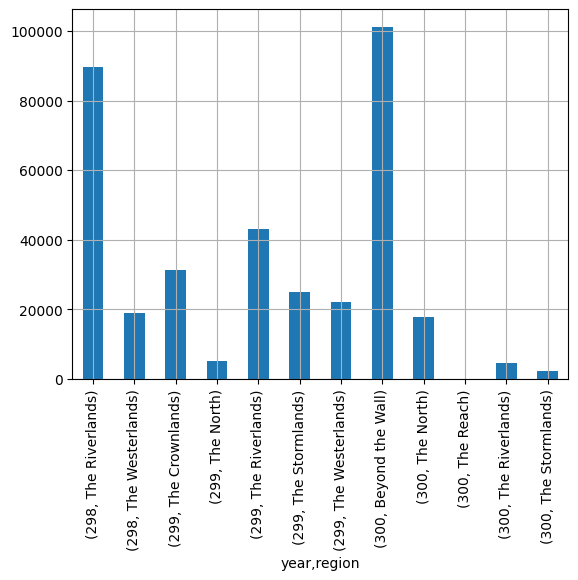

In [110]:
import matplotlib.pyplot as plt
G['people'].plot(kind='bar')
plt.grid()

## Прикладной Анализ Данных

Теперь посмотрим на небольшую аналитическую задачу по предсказанию ухода клиента от телефонного оператора.

In [111]:
df = pd.read_csv('data/telecom_churn.csv')
df.head(3)

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False


Метод **`describe`** показывает основные статистические характеристики данных по каждому числовому признаку (типы `int64` и `float64`): число непропущенных значений, среднее, стандартное отклонение, диапазон, медиану, 0.25 и 0.75 квартили.

In [79]:
df.describe()

,Account length,Area code,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls
count,3333.0000,3333.0000,3333.0000,3333.0000,3333.0000,3333.0000,3333.0000,3333.0000,3333.0000,3333.0000,3333.0000,3333.0000,3333.0000,3333.0000,3333.0000,3333.0000
mean,101.0648,437.1824,8.0990,179.7751,100.4356,30.5623,200.9803,100.1143,17.0835,200.8720,100.1077,9.0393,10.2373,4.4794,2.7646,1.5629
std,39.8221,42.3713,13.6884,54.4674,20.0691,9.2594,50.7138,19.9226,4.3107,50.5738,19.5686,2.2759,2.7918,2.4612,0.7538,1.3155
min,1.0000,408.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,23.2000,33.0000,1.0400,0.0000,0.0000,0.0000,0.0000
25%,74.0000,408.0000,0.0000,143.7000,87.0000,24.4300,166.6000,87.0000,14.1600,167.0000,87.0000,7.5200,8.5000,3.0000,2.3000,1.0000
50%,101.0000,415.0000,0.0000,179.4000,101.0000,30.5000,201.4000,100.0000,17.1200,201.2000,100.0000,9.0500,10.3000,4.0000,2.7800,1.0000
75%,127.0000,510.0000,20.0000,216.4000,114.0000,36.7900,235.3000,114.0000,20.0000,235.3000,113.0000,10.5900,12.1000,6.0000,3.2700,2.0000
max,243.0000,510.0000,51.0000,350.8000,165.0000,59.6400,363.7000,170.0000,30.9100,395.0000,175.0000,17.7700,20.0000,20.0000,5.4000,9.0000


Библиотека `seaborn` - более удобная замена `matplotib` в некоторых случаях. Например в рисовании ящиков с усами. Но при этом внутри она реализована на том же `matplotlib` 

/Users/stihin/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/stihin/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


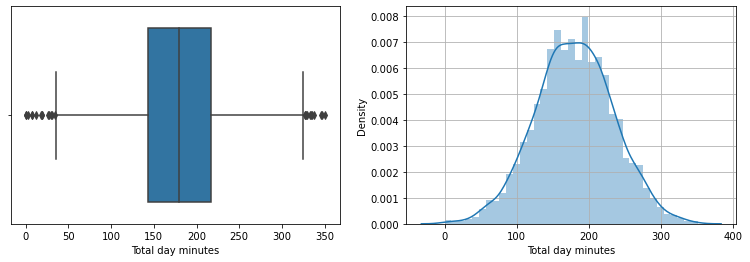

In [80]:
import seaborn as sns
plt.figure(figsize=(13, 4))
plt.subplot(1, 2, 1)
sns.boxplot(df['Total day minutes'])
plt.subplot(1, 2, 2)
sns.distplot(df['Total day minutes']);
plt.grid()

Чтобы посмотреть статистику по нечисловым признакам, нужно явно указать интересующие нас типы в параметре `include`. Можно также задать `include`='all', чтоб вывести статистику по всем имеющимся признакам.

In [81]:
df.describe(include=['object', 'bool'])

,State,International plan,Voice mail plan,Churn
count,3333,3333,3333,3333
unique,51,2,2,2
top,WV,No,No,False
freq,106,3010,2411,2850


Для категориальных (тип `object`) и булевых (тип `bool`) признаков  можно воспользоваться методом **`value_counts`**. Посмотрим на распределение нашей целевой переменной — `Churn`:

In [82]:
df['Churn'].value_counts()

False    2850
True      483
Name: Churn, dtype: int64

2850 пользователей из 3333 — лояльные, значение переменной `Churn` у них — `0`.

Посмотрим на распределение пользователей по переменной `Area code`. Укажем значение параметра `normalize=True`, чтобы посмотреть не абсолютные частоты, а относительные.

In [83]:
df['Area code'].value_counts(normalize=True)

415    0.4965
510    0.2520
408    0.2514
Name: Area code, dtype: float64

## Сводные таблицы

Допустим, мы хотим посмотреть, как наблюдения в нашей выборке распределены в контексте двух признаков — `Churn` и `Customer service calls`. Для этого мы можем построить **таблицу сопряженности**, воспользовавшись методом **`crosstab`**:

In [84]:
pd.crosstab(df['Churn'], df['International plan'])

International plan,No,Yes
Churn,,
False,2664,186
True,346,137


In [85]:
pd.crosstab(df['Churn'], df['Voice mail plan'], normalize=True)

Voice mail plan,No,Yes
Churn,,
False,0.6025,0.2526
True,0.1209,0.0240


Мы видим, что большинство пользователей — лояльные и пользуются дополнительными услугами (международного роуминга / голосовой почты).

Продвинутые пользователи `Excel` наверняка вспомнят о такой фиче, как **сводные таблицы** (`pivot tables`). В `Pandas` за сводные таблицы отвечает метод **`pivot_table`**, который принимает в качестве параметров:

* `values` – список переменных, по которым требуется рассчитать нужные статистики,
* `index` – список переменных, по которым нужно сгруппировать данные,
* `aggfunc` — то, что нам, собственно, нужно посчитать по группам — сумму, среднее, максимум, минимум или что-то ещё.

Давайте посмотрим среднее число дневных, вечерних и ночных звонков для разных `Area code`:

In [86]:
df.pivot_table(values = ['Total day calls', 'Total eve calls', 'Total night calls'], 
               index = ['Area code'], 
               aggfunc= lambda X: X.mean()) # можно запихать любую агрегирующую функцию


,Total day calls,Total eve calls,Total night calls
Area code,,,
408,100.4964,99.7888,99.0394
415,100.5764,100.5039,100.3982
510,100.0976,99.6714,100.6012


--------



## Первые попытки анализа данных


Посмотрим, как отток связан с признаком **"Подключение международного роуминга"** (`International plan`). Сделаем это с помощью сводной таблички `crosstab`, а также путем иллюстрации с `Seaborn`.

In [87]:
# надо дополнительно установить (команда в терминале)
# чтоб картинки рисовались в тетрадке
# !conda install seaborn 
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns
plt.rcParams['figure.figsize'] = (8, 6)

In [88]:
pd.crosstab(df['Churn'], df['International plan'], margins=True)

International plan,No,Yes,All
Churn,,,
False,2664,186,2850
True,346,137,483
All,3010,323,3333


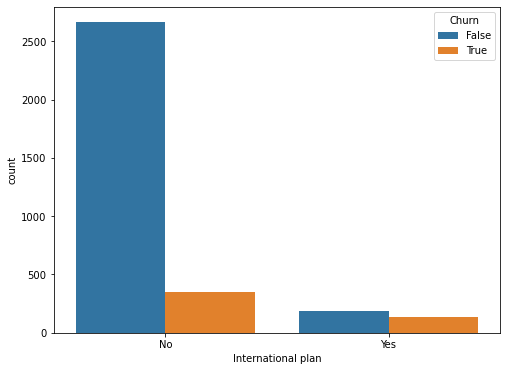

In [89]:
sns.countplot(x='International plan', hue='Churn', data=df);

Видим, что когда роуминг подключен, доля оттока намного выше – интересное наблюдение! Возможно, большие и плохо контролируемые траты в роуминге очень конфликтогенны и приводят к недовольству клиентов телеком-оператора и, соответственно, к их оттоку. 

Далее посмотрим на еще один важный признак – **"Число обращений в сервисный центр"** (`Customer service calls`). Также построим сводную таблицу и картинку.

In [90]:
pd.crosstab(df['Churn'], df['Customer service calls'], margins=True, normalize=True)

Customer service calls,0,1,2,3,4,5,6,7,8,9,All
Churn,,,,,,,,,,,
False,0.1815,0.3177,0.2016,0.1155,0.0270,0.0078,0.0024,0.0012,0.0003,0.0000,0.8551
True,0.0276,0.0366,0.0261,0.0132,0.0228,0.0120,0.0042,0.0015,0.0003,0.0006,0.1449
All,0.2091,0.3543,0.2277,0.1287,0.0498,0.0198,0.0066,0.0027,0.0006,0.0006,1.0000


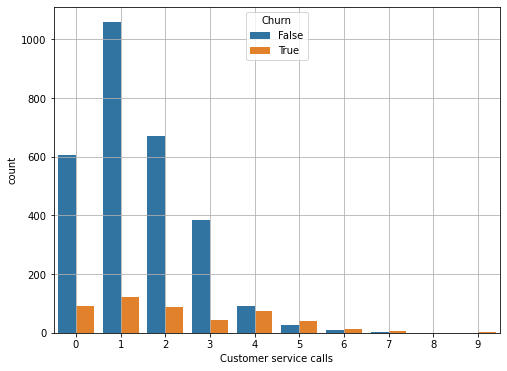

In [91]:
sns.countplot(x='Customer service calls', hue='Churn', data=df);
plt.grid()

Может быть, по сводной табличке это не так хорошо видно (или скучно ползать взглядом по строчкам с цифрами), а вот картинка красноречиво свидетельствует о том, что доля оттока сильно возрастает начиная с 4 звонков в сервисный центр. 

Добавим теперь в наш DataFrame бинарный признак — результат сравнения `Customer service calls > 3`. И еще раз посмотрим, как он связан с оттоком. 

In [92]:
df['Many_service_calls'] = (df['Customer service calls'] > 3).astype('int')

pd.crosstab(df['Many_service_calls'], df['Churn'], margins=True)

Churn,False,True,All
Many_service_calls,,,
0,2721,345,3066
1,129,138,267
All,2850,483,3333


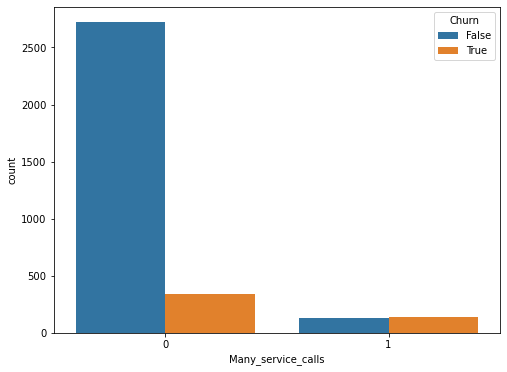

In [93]:
sns.countplot(x='Many_service_calls', hue='Churn', data=df);

Объединим рассмотренные выше условия и построим сводную табличку для этого объединения и оттока.

In [98]:
pd.crosstab(df['Many_service_calls'] & df['International plan'].map({'No': 0, 'Yes':1}) , 
            df['Churn'])

Churn,False,True
row_0,,
0,2841,464
1,9,19


Значит, прогнозируя отток клиента в случае, когда число звонков в сервисный центр больше 3 и подключен роуминг (и прогнозируя лояльность – в противном случае), можно ожидать около 85.8% правильных попаданий (ошибаемся всего 464 + 9 раз). Эти 85.8%, которые мы получили с помощью очень простых рассуждений – это неплохая отправная точка (*baseline*) для дальнейших моделей машинного обучения, которые мы будем строить. 

В целом до появления машинного обучения процесс анализа данных выглядел примерно так. Прорезюмируем:
    
- Доля лояльных клиентов в выборке – 85.5%. Самая наивная модель, ответ которой "Клиент всегда лоялен" на подобных данных будет угадывать примерно в  85.5% случаев. То есть доли правильных ответов (*accuracy*) последующих моделей должны быть как минимум не меньше, а лучше, значительно выше этой цифры;
- С помощью простого прогноза , который условно можно выразить такой формулой: "International plan = True & Customer Service calls > 3 => Churn = 1, else Churn = 0", можно ожидать долю угадываний 85.8%, что еще чуть выше 85.5%
- Эти два бейзлайна мы получили без всякого машинного обучения, и они служат отправной точной для наших последующих моделей. Если окажется, что мы громадными усилиями увеличиваем долю правильных ответов всего, скажем, на 0.5%, то возможно, мы что-то делаем не так, и достаточно ограничиться простой моделью из двух условий. 
- Перед обучением сложных моделей рекомендуется немного покрутить данные и проверить простые предположения. Более того, в бизнес-приложениях машинного обучения чаще всего начинают именно с простых решений, а потом экспериментируют с их усложнением. 

----------

## Полезные материалы

* [Оптимизация Pandas для больших данных](https://habr.com/en/company/ruvds/blog/442516/)
* [Pandas for Data Analysis](https://github.com/jupyter/jupyter/wiki/A-gallery-of-interesting-Jupyter-Notebooks#pandas-for-data-analysis)
* [Сборник полезных тетрадок по Pandas](https://github.com/HorusHeresyHeretic/Pandas_Practice)
* [Learn Pandas](https://bitbucket.org/hrojas/learn-pandas/src/master/)
* [MultiIndex](https://pandas.pydata.org/pandas-docs/stable/user_guide/advanced.html)
* [Reshape and Index](https://pandas.pydata.org/pandas-docs/stable/user_guide/reshaping.html)

## Источники материалов:
* [mlcourse.ai](https://github.com/Yorko/mlcourse.ai) - курс Машинного обучения с OpenDataScience
* [AI Seminars](https://github.com/AICommunityInno/Seminars) - семинары по Машинному обучению в Иннополисе
* [HSE-ML course](https://github.com/esokolov/ml-course-hse) - курс Машинного обучения ФКН ВШЭ